# Project_05 - EDA & HT (Mobile)

**Project Description**

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

**Goal**
<br>Analyze the datasets and advise on which of the plans brings in more revenue in order to adjust the advertising budget.

**Project description
Description of the plans**
<br>Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

**Surf**
<br>.Monthly charge:20
<br>.500 monthly minutes, 50 texts, and 15 GB of data
<br>.After exceeding the package limits:
<br>.1 minute: 3 cents
<br>.1 text message: 3 cents
<br>.1 GB of data: \\$10

**Ultimate**
<br>Monthly charge: 70
<br>3000 monthly minutes, 1000 text messages, and 30 GB of data
<br>After exceeding the package limits:
<br>1 minute: 1 cent
<br>1 text message: 1 cent
<br>1 GB of data: \\$7

**Instructions on completing the project**
<br>File path:
<br>/datasets/megaline_calls.csv
<br>/datasets/megaline_internet.csv
<br>/datasets/megaline_messages.csv
<br>/datasets/megaline_plans.csv
<br>/datasets/megaline_users.csv

**Step 2. Prepare the data**
<br>Convert the data to the necessary types
<br>Find and eliminate errors in the data
<br>Explain what errors you found and how you removed them.
<br>For each user, find:
<br>The number of calls made and minutes used per month
<br>The number of text messages sent per month
<br>The volume of data per month
<br>The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; <br>multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

**Step 3. Analyze the data**
<br>Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. <br>Calculate the mean, variance, and standard deviation. Plot histograms. Describe the distributions.

**Step 4. Test the hypotheses**
<br>The average revenue from users of Ultimate and Surf calling plans differs.
<br>The average revenue from users in NY-NJ area is different from that of the users from other regions.
You decide what alpha value to use.

**Explain:**
<br>How you formulated the null and alternative hypotheses.
<br>What criterion you used to test the hypotheses and why.

**Step 5. Write an overall conclusion**
<br>Format: Complete the task in Jupyter Notebook. Put the programming code in code cells and text explanations in markdown cells, then apply formatting and headings.
Description of the data
Remember! Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

## Import packages & Load data

In [1]:
# Loading all the libraries
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('datasets/project_13_dataset_calls.csv')
internet = pd.read_csv('datasets/project_13_dataset_internet.csv')
messages = pd.read_csv('datasets/project_13_dataset_messages.csv')
plans = pd.read_csv('datasets/project_13_dataset_plans.csv')
users = pd.read_csv('datasets/project_13_dataset_users.csv')

In [3]:
# calls.to_csv('~/work/project_datasets/project_13_dataset_1.csv', index=False, header=list(calls.columns))
# internet.to_csv('~/work/project_datasets/project_13_dataset_2.csv', index=False, header=list(internet.columns))
# messages.to_csv('~/work/project_datasets/project_13_dataset_3.csv', index=False, header=list(messages.columns))
# plans.to_csv('~/work/project_datasets/project_13_dataset_4.csv', index=False, header=list(plans.columns))
# users.to_csv('~/work/project_datasets/project_13_dataset_5.csv', index=False, header=list(users.columns))

## Prepare the data

In [4]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [5]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [6]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users.info()
display(users['plan'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


surf        339
ultimate    161
Name: plan, dtype: int64

**Section Comment**
<br>All the dates in the datasets were of 'object' data type, so I changed all the datatypes to 'datetime64'.

## Plans

In [9]:
# Print a sample of data for plans
display(plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Comment**
<br>The 'mb_per_month_included' is in mb, while 'usd_per_gb' is in gb, I will reconcile this difference in the later stage of analysis.

## Users

In [10]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


**Comment**
<br>All the datatypes seems to be correct and there aren't any missing values in the plans dataset, except in the 'churn_date' column.

In [11]:
# Print a sample of data for users
display(users.head(5))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Fix Data

In [12]:
display(users.duplicated().sum())
display(users['user_id'].duplicated().sum())
display(users[['first_name','last_name']].duplicated().sum())

0

0

0

**Comment**
<br>There aren't any obvious duplicate values to be removed.

In [13]:
users.fillna('Unknown', inplace=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


**Comment**
<br>I filled the missing values in the 'churn_date' column with 'Unknown'.

### Enrich Data

In [14]:
def state_nynj(row):
    state = row['city']
    if 'NY-NJ' in state:
        return 'NYNJ'
    else:
        return "Other"

users['state'] = users.apply(state_nynj, axis=1)
display(users[(users['state']=='NYNJ')].head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,Unknown,NYNJ
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,NYNJ
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,Unknown,NYNJ
27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,Unknown,NYNJ
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,Unknown,NYNJ


**Comment**
<br>I added the 'state' column to distinguish NY-NJ and other states for the last question in the project. (1.14-2)

## Calls

In [15]:
# Print the general/summary information about the calls' DataFrame
calls.info()
display(calls.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


**Comment**
<br>All the datatypes seems to be correct and there aren't any missing values in the plans dataset.

In [16]:
# Print a sample of data for calls
display(calls.head(3))

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48


### Fix data

In [17]:
display(calls.duplicated().sum())
display(calls['id'].duplicated().sum())

0

0

**Comment**
<br>There aren't any obvious duplicate values to be removed.

### Enrich data

In [18]:
calls['month'] = calls['call_date'].dt.month
calls['duration'] = np.ceil(calls['duration'])
display(calls.head(3))

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12


**Comment**
<br>1. I added the 'month' column in order to aggregate each user's calls per month.
<br>2. I rounded up all the call duration to the next minute.

## Messages

In [19]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


**Comment**
<br>All the datatypes seem to be correct and there aren't any missing values in the plans dataset.

In [20]:
# Print a sample of data for messages
display(messages.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Fix data

In [21]:
display(messages.duplicated().sum())
display(messages['id'].duplicated().sum())

0

0

**Comment**
<br>There aren't any obvious duplicate values to be removed.


### Enrich data

In [22]:
messages['month'] = messages['message_date'].dt.month
display(messages.head(3))

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12


**Comment**
<br>I added the 'month' column in order to aggregate each user's messages per month.

## Internet

In [23]:
# Print the general/summary information about the internet DataFrame
internet.info()
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


**Comment**
<br>All the datatypes seem to be correct and there aren't any missing values in the plans dataset.

In [24]:
# Print a sample of data for the internet traffic
display(internet.head(3))

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40


### Fix data

In [25]:
display(internet.duplicated().sum())
display(internet['id'].duplicated().sum())

0

0

**Comment**
<br>There aren't any obvious duplicate values to be removed. 

### Enrich data

In [26]:
internet['month'] = internet['session_date'].dt.month
display(internet.head(3))

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12


**Comment**
<br>I added the 'month' column in order to aggregate each user's internet usage per month.

## Study plan conditions

In [27]:
# Print out the plan conditions and make sure they are clear for you
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

In [28]:
# Calculate the number of calls made by each user per month. Save the result.
#display(calls.head(1))
calls_per_month = calls.groupby(['user_id','month'])[['id']].count()
display(calls_per_month.head())

id
user_id month    
1000    12     16
1001    8      27
        9      49
        10     65
        11     64

In [29]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = calls.groupby(['user_id','month'])[['duration']].sum()
display(minutes_per_month.head())

duration
user_id month          
1000    12        124.0
1001    8         182.0
        9         315.0
        10        393.0
        11        426.0

In [30]:
# Calculate the number of messages sent by each user per month. Save the result.
#display(messages.head(1))
messages_per_month = messages.groupby(['user_id','month'])[['id']].count()
display(messages_per_month.head())

id
user_id month    
1000    12     11
1001    8      30
        9      44
        10     53
        11     36

In [31]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
#display(internet.head(1))
internet_per_month = internet.groupby(['user_id','month'])[['mb_used']].sum()
display(internet_per_month.head())

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30

In [32]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
df1 = calls_per_month.merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
.merge(messages_per_month, left_index=True, right_index=True, how='outer', suffixes=['_calls','_msg'])\
.merge(internet_per_month, left_index=True, right_index=True, how='outer')
display(df1.head())
df1 = df1.reset_index()

id_calls  duration  id_msg   mb_used
user_id month                                      
1000    12         16.0     124.0    11.0   1901.47
1001    8          27.0     182.0    30.0   6919.15
        9          49.0     315.0    44.0  13314.82
        10         65.0     393.0    53.0  22330.49
        11         64.0     426.0    36.0  18504.30

In [33]:
# Add the plan information
#display(df1.head())
df2 = df1.merge(users, on='user_id', how='outer')\
.merge(plans, left_on='plan', right_on='plan_name', how='outer')
display(df2.head(3))
#display(df2[['user_id']].value_counts())
display(len(set(df2['user_id'])))

,user_id,month,id_calls,duration,id_msg,mb_used,first_name,last_name,age,city,...,churn_date,state,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12.0,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,Unknown,Other,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,11.0,2.0,10.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18,Other,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,12.0,9.0,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,2018-12-18,Other,1000,30720,3000,70,7,0.01,0.01,ultimate


500

**Comment**
<br>Here I have merged all 5 datasets provided into one dataframe. I will primarily be using this df for the following analyses.

In [34]:
#display(df2.columns)
display(df2[['user_id', 'month', 'id_calls', 'duration', 'id_msg', 'mb_used', 'plan',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']].head())
display(df2.info())

,user_id,month,id_calls,duration,id_msg,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1006,11.0,2.0,10.0,15.0,2068.37,ultimate,1000,30720,3000,70,7,0.01,0.01
2,1006,12.0,9.0,59.0,139.0,32118.82,ultimate,1000,30720,3000,70,7,0.01,0.01
3,1008,10.0,71.0,476.0,21.0,17106.99,ultimate,1000,30720,3000,70,7,0.01,0.01
4,1008,11.0,63.0,446.0,37.0,23676.72,ultimate,1000,30720,3000,70,7,0.01,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2303 non-null   int64         
 1   month                  2293 non-null   float64       
 2   id_calls               2258 non-null   float64       
 3   duration               2258 non-null   float64       
 4   id_msg                 1806 non-null   float64       
 5   mb_used                2277 non-null   float64       
 6   first_name             2303 non-null   object        
 7   last_name              2303 non-null   object        
 8   age                    2303 non-null   int64         
 9   city                   2303 non-null   object        
 10  reg_date               2303 non-null   datetime64[ns]
 11  plan                   2303 non-null   object        
 12  churn_date             2303 non-null   object        
 13  sta

None

In [35]:
display(df2[df2['month'].isna()][['user_id','id_calls', 'duration', 'id_msg', 'mb_used','city','churn_date','reg_date','plan']].head())

,user_id,id_calls,duration,id_msg,mb_used,city,churn_date,reg_date,plan
720,1025,NaN,NaN,NaN,NaN,"Atlanta-Sandy Springs-Roswell, GA MSA",Unknown,2018-10-28,ultimate
721,1269,NaN,NaN,NaN,NaN,"Dallas-Fort Worth-Arlington, TX MSA",2018-12-15,2018-09-13,ultimate
722,1275,NaN,NaN,NaN,NaN,"New York-Newark-Jersey City, NY-NJ-PA MSA",Unknown,2018-11-29,ultimate
723,1463,NaN,NaN,NaN,NaN,"Atlanta-Sandy Springs-Roswell, GA MSA",Unknown,2018-11-27,ultimate
2297,1129,NaN,NaN,NaN,NaN,"Baton Rouge, LA MSA",2018-12-27,2018-11-10,surf


In [36]:
def calculate_overcharge(df, usage, plan, unit_price):
    revenue = []
    for index, row in df.iterrows():
        if (row[usage] - row[plan]) > 0 & (usage=='mb_used'):
            revenue.append(np.ceil((row[usage] - row[plan])/1024)*row[unit_price])
        elif (row[usage] - row[plan]) > 0:
            revenue.append((row[usage] - row[plan])*row[unit_price])
        else:    
            revenue.append(0)
    return revenue

**Comment**
<br>1. Here I have defined a function to calcuate the revenue for each media type overcharge.
<br>2. The formula for internet usage is a little different as the total is rounded up for each month. So I aggregated the monthly usage first, subtracted the package allowance, then divided by 1000 to convert mb to gb. Finally, I multiplied this number by the unit_price to get the total internet overcharge.

In [37]:
# Calculate the monthly revenue for each user
df2['call_overcharge'] = calculate_overcharge(df2, 'duration', 'minutes_included', 'usd_per_minute')
df2['message_overcharge'] = calculate_overcharge(df2, 'id_msg', 'messages_included', 'usd_per_message')
df2['internet_overcharge'] = calculate_overcharge(df2, 'mb_used', 'mb_per_month_included', 'usd_per_gb')
df2['total_overcharge'] = df2['call_overcharge'] + df2['message_overcharge'] + df2['internet_overcharge']
df2['total_revenue'] = df2['usd_monthly_pay'] + df2['total_overcharge']

display(df2.head(3))

,user_id,month,id_calls,duration,id_msg,mb_used,first_name,last_name,age,city,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,call_overcharge,message_overcharge,internet_overcharge,total_overcharge,total_revenue
0,1000,12.0,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,0.0,70.0
1,1006,11.0,2.0,10.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,70,7,0.01,0.01,ultimate,0.0,0.0,0.0,0.0,70.0
2,1006,12.0,9.0,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,70,7,0.01,0.01,ultimate,0.0,0.0,14.0,14.0,84.0


In [38]:
display(df2['plan'].value_counts())
display(df2.groupby('plan')[['usd_monthly_pay', 'total_overcharge', 'total_revenue']].agg(['sum', 'mean']))

surf        1579
ultimate     724
Name: plan, dtype: int64

usd_monthly_pay       total_overcharge            total_revenue  \
                     sum  mean              sum       mean           sum   
plan                                                                       
surf               31580  20.0         60827.18  38.522597      92407.18   
ultimate           50680  70.0          1666.00   2.301105      52346.00   

                     
               mean  
plan                 
surf      58.522597  
ultimate  72.301105

**Section Observation**
1. While 'ultimate' package costs 3.5x the 'surf' package, the overcharges adds a significant portion to the total revenue from the 'surf' users.
2. The average monthly overcharges for the 'surf' users were acutally ~2x the cost of the monthly 'surf' package.
3. In the end. the average monthly revenue per user between 'surf' and 'ultimate' plan was \\$59 vs \\$72.


## Study user behaviour

### Calls

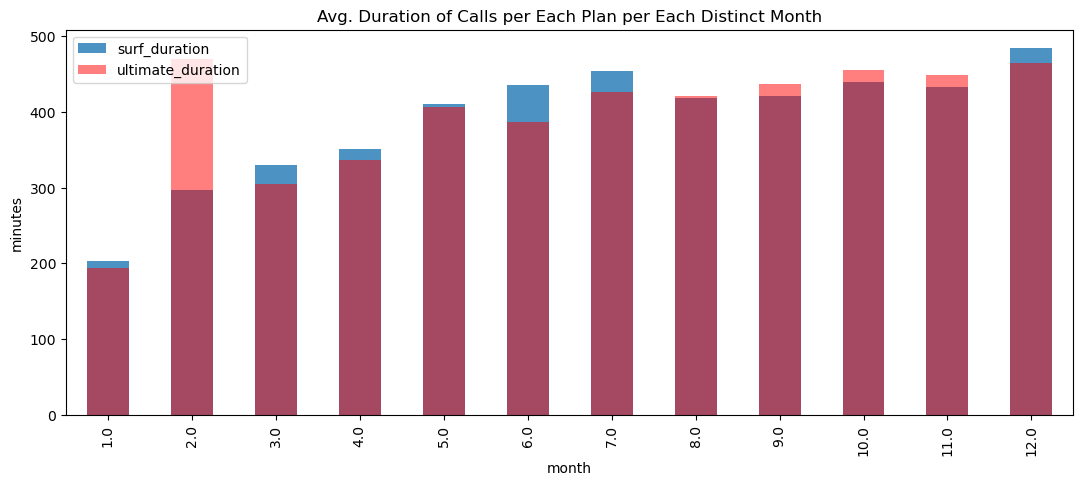

In [39]:
# Compare average duration of calls (minutes) per each plan per each distinct month. Plot a bar plot to visualize it.

fig, ax = plt.subplots(figsize=[13, 5])
df2[df2['plan']=='surf'].groupby(['month'])['duration'].mean().plot(kind='bar', ax=ax, alpha=0.8, ylabel='minutes',
                                                                    title='Avg. Duration of Calls per Each Plan per Each Distinct Month')
df2[df2['plan']=='ultimate'].groupby(['month'])['duration'].mean().plot(kind='bar', ax=ax, alpha=0.5, color='r')
plt.legend(['surf_duration','ultimate_duration'])
plt.show()

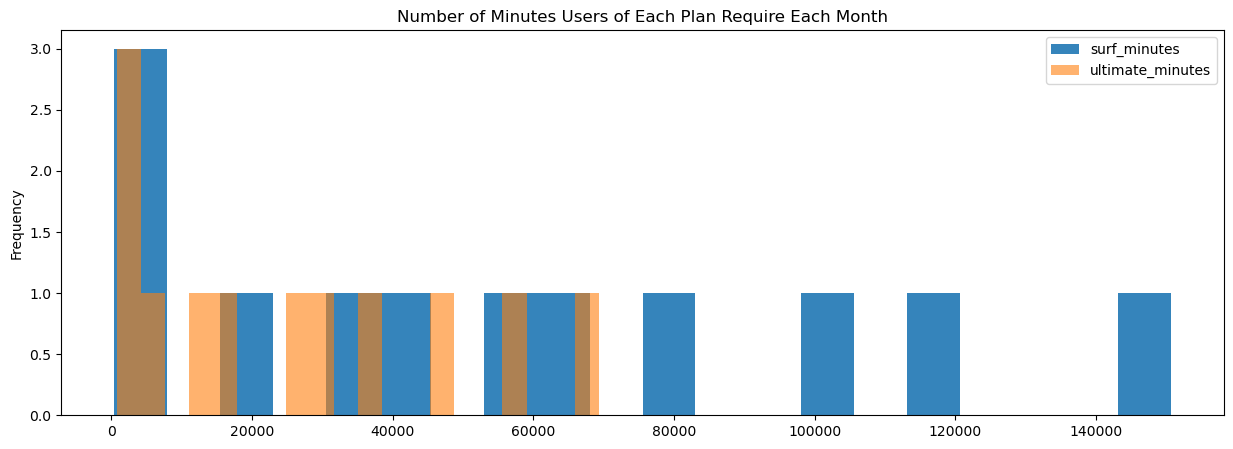

In [40]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
fig, ax = plt.subplots(figsize=[12, 5])
df2[df2['plan']=='surf'].groupby(['month'])[['duration']].sum().plot(kind='hist', bins=20, ax=ax, figsize=[15,5], alpha=0.9)
df2[df2['plan']=='ultimate'].groupby(['month'])[['duration']].sum().plot(kind='hist', bins=20, ax=ax, figsize=[15,5], alpha=0.6)
plt.legend(['surf_minutes','ultimate_minutes'])
plt.title('Number of Minutes Users of Each Plan Require Each Month')
plt.show()

In [41]:
# Calculate the mean and the variance of the monthly call duration
display(df2[['duration']].agg(['mean','var', 'std']))

,duration
mean,435.937555
var,53811.168009
std,231.972343


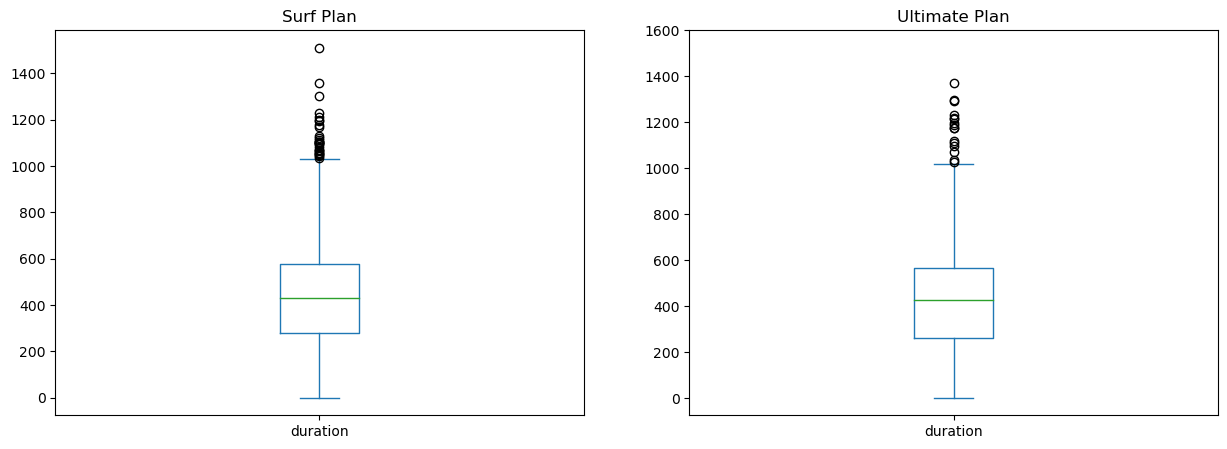

In [42]:
# Plot a boxplot to visualize the distribution of the monthly call duration
fig, ax = plt.subplots(1, 2, figsize=[15, 5])

df2[df2['plan']=='surf']['duration'].plot(kind='box', ax=ax[0])
df2[df2['plan']=='ultimate']['duration'].plot(kind='box', ax=ax[1])
plt.ylim((-75,1600))
ax[0].set_title('Surf Plan')
ax[1].set_title('Ultimate Plan')
plt.show()

**Section Observation**
1. Average call duration increases throughout the year, inceasing steadily from January to December.
2. The usage trend and amount is quite similar between 'surf' and 'ultimate' plan users. Except,
<br>  -In Feb and Mar, 'ultimate' plan users has much higher average call duration.
<br>  -In Jan, Apr, and Jun, 'surf' plan users has much higher average call duration.
3. The median call duration and IQR range is quite similar between the plans.
4. But there are more outliers among 'surf' users between 1000-1400 minute range than 'ultimate' users.

### Messages

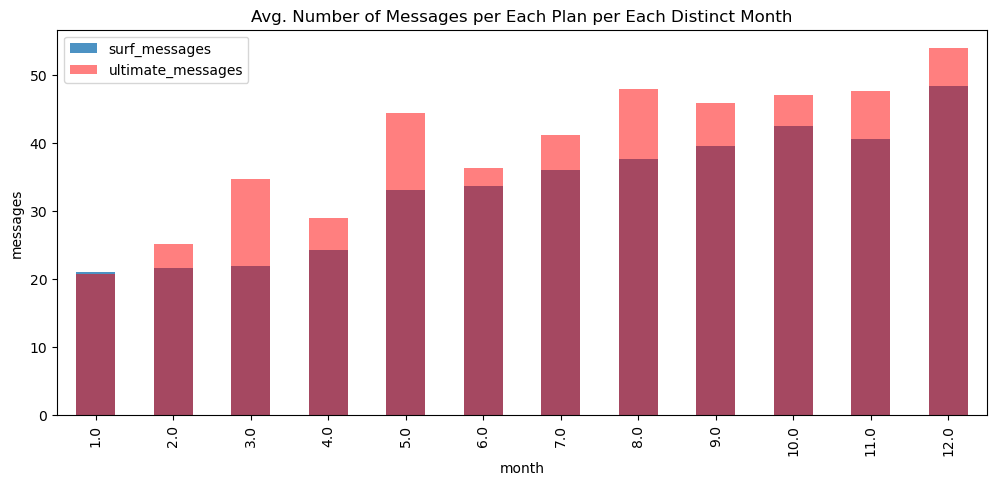

In [43]:
# Compare the number of messages users of each plan tend to send each month
#display(df2.groupby(['plan','month'])[['id_msg']].mean())

fig, ax = plt.subplots(figsize=[12, 5])
df2[df2['plan']=='surf'].groupby(['month'])['id_msg'].mean().plot(kind='bar', ax=ax, alpha=0.8, ylabel='messages',
                                                                    title='Avg. Number of Messages per Each Plan per Each Distinct Month')
df2[df2['plan']=='ultimate'].groupby(['month'])['id_msg'].mean().plot(kind='bar', ax=ax, alpha=0.5, color='r')
plt.legend(['surf_messages','ultimate_messages'])
plt.show()

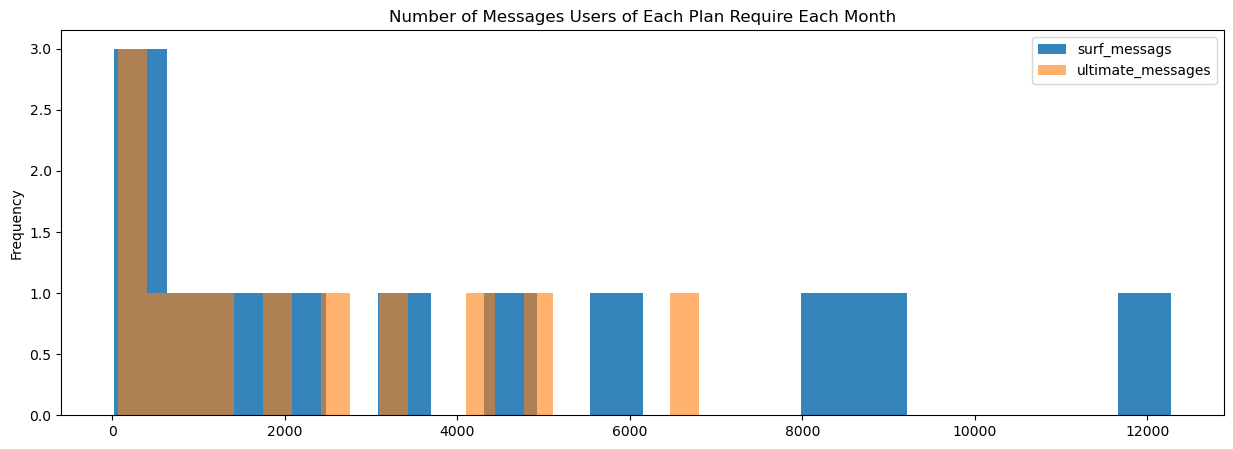

In [44]:
# Compare the number of messages users of each plan require each month. Plot a histogram.
fig, ax = plt.subplots(figsize=[12, 5])
df2[df2['plan']=='surf'].groupby(['month'])[['id_msg']].sum().plot(kind='hist', bins=20, ax=ax, figsize=[15,5], alpha=0.9)
df2[df2['plan']=='ultimate'].groupby(['month'])[['id_msg']].sum().plot(kind='hist', bins=20, ax=ax, figsize=[15,5], alpha=0.6)
plt.legend(['surf_messags','ultimate_messages'])
plt.title('Number of Messages Users of Each Plan Require Each Month')
plt.show()

In [45]:
# Calculate the mean and the variance of the monthly message counts
display(df2[['id_msg']].agg(['mean','var', 'std']))

,id_msg
mean,42.110188
var,1097.128572
std,33.122931


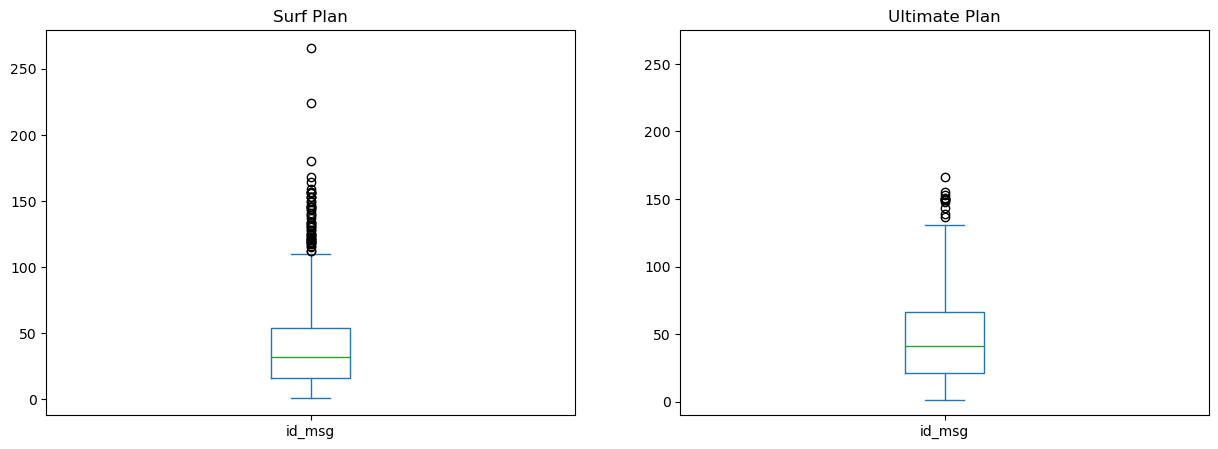

In [46]:
# Plot a boxplot to visualize the distribution of the monthly message counts
fig, ax = plt.subplots(1, 2, figsize=[15, 5])

df2[df2['plan']=='surf']['id_msg'].plot(kind='box', ax=ax[0])
df2[df2['plan']=='ultimate']['id_msg'].plot(kind='box', ax=ax[1])
plt.ylim((-10,275))
ax[0].set_title('Surf Plan')
ax[1].set_title('Ultimate Plan')
plt.show()

**Section Observation**
1. Average message amount increases throughout the year, inceasing steadily from January to December.
2. The usage trend is similar between 'surf' and 'ultimate' plan users, but 'ultimate' plan users on average send 10-20% more messages.
3. The median message count and IQR range is higher for the 'ultimate' plan users.
4. But, there are many more outliers among 'surf' plan users compared to 'ultimate' plan users.

### Internet

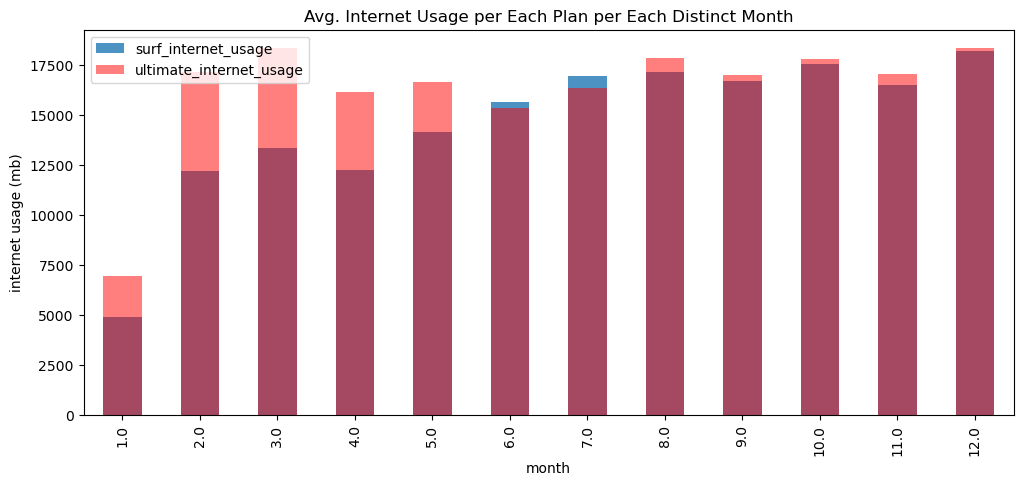

In [47]:
#display(df2.groupby(['plan','month'])[['id_msg']].mean())
fig, ax = plt.subplots(figsize=[12, 5])
df2[df2['plan']=='surf'].groupby(['month'])['mb_used'].mean().plot(kind='bar', ax=ax, alpha=0.8, ylabel='internet usage (mb)',
                                                                    title='Avg. Internet Usage per Each Plan per Each Distinct Month')
df2[df2['plan']=='ultimate'].groupby(['month'])['mb_used'].mean().plot(kind='bar', ax=ax, alpha=0.5, color='r')
plt.legend(['surf_internet_usage','ultimate_internet_usage'])
plt.show()

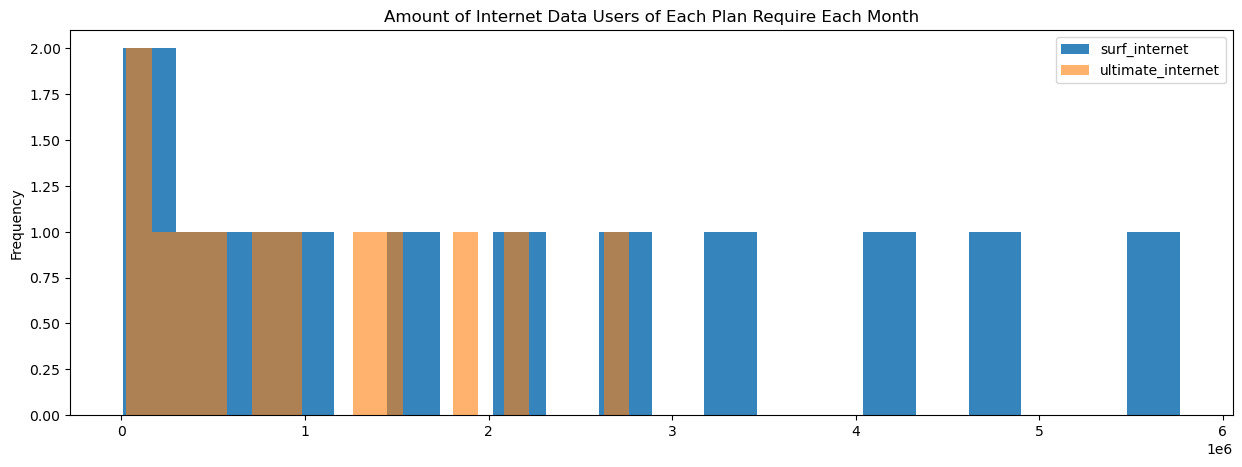

In [48]:
# Compare the amount of internet data users of each plan require each month. Plot a histogram.
fig, ax = plt.subplots(figsize=[12, 5])
df2[df2['plan']=='surf'].groupby(['month'])[['mb_used']].sum().plot(kind='hist', bins=20, ax=ax, figsize=[15,5], alpha=0.9)
df2[df2['plan']=='ultimate'].groupby(['month'])[['mb_used']].sum().plot(kind='hist', bins=20, ax=ax, figsize=[15,5], alpha=0.6)
plt.legend(['surf_internet','ultimate_internet'])
plt.title('Amount of Internet Data Users of Each Plan Require Each Month')
plt.show()

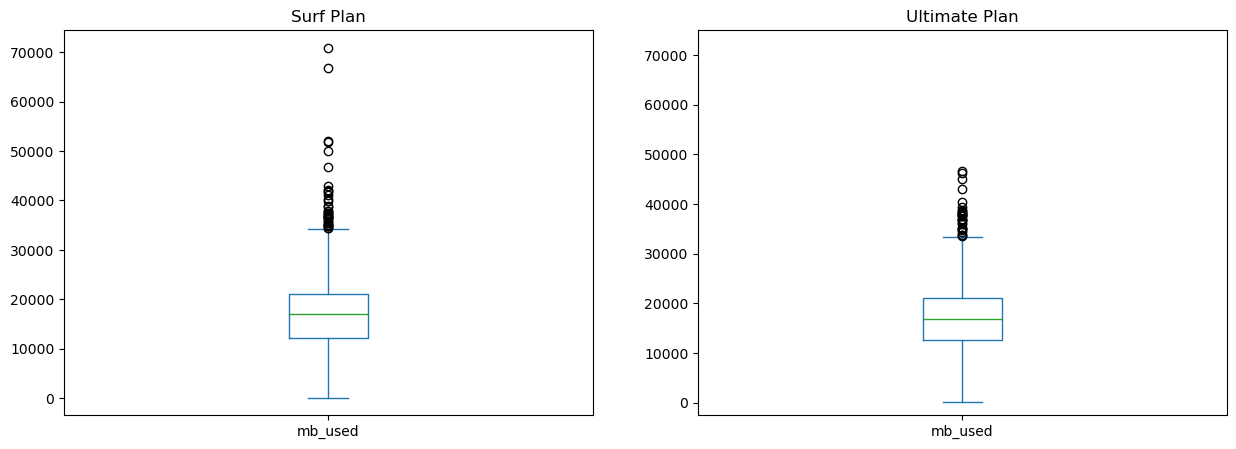

In [49]:
# Plot a boxplot to visualize the distribution of the monthly message counts
fig, ax = plt.subplots(1, 2, figsize=[15, 5])

df2[df2['plan']=='surf']['mb_used'].plot(kind='box', ax=ax[0])
df2[df2['plan']=='ultimate']['mb_used'].plot(kind='box', ax=ax[1])
plt.ylim((-2500,75000))
ax[0].set_title('Surf Plan')
ax[1].set_title('Ultimate Plan')
plt.show()

In [50]:
# Compare the amount of internet traffic consumed by users per plan
display(df2[['mb_used']].agg(['mean','var', 'std']))

,mb_used
mean,1.688220e+04
var,6.193351e+07
std,7.869785e+03


**Section Observation**
1. Average internet usage tends to increases throughout the year, inceasing steadily from January to December.
2. In February and March, 'ultimate' plan users used sifnificantly more (almost double) internet data than 'surf' plan users.
3. The median internet usage and IQR range is quite similar between the 'surf' and 'ultimate' plan users.

## Revenue

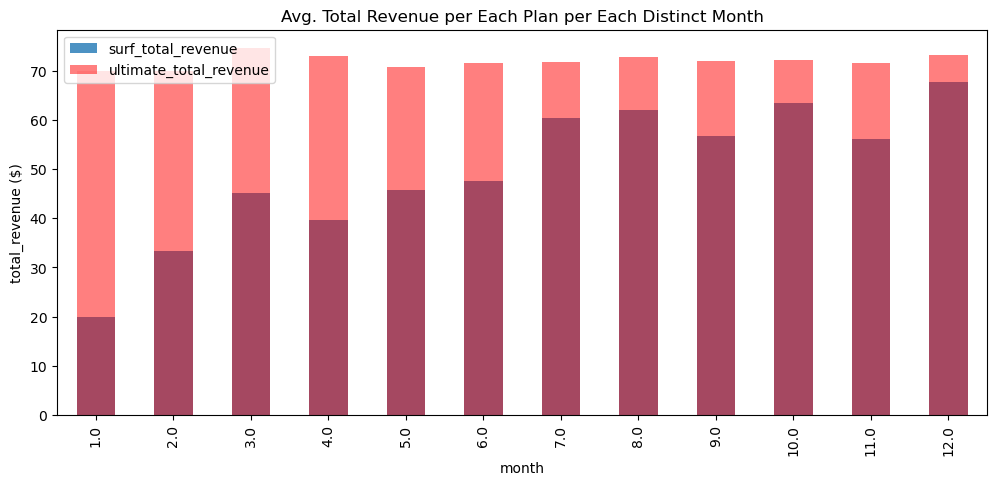

In [51]:
fig, ax = plt.subplots(figsize=[12, 5])
df2[df2['plan']=='surf'].groupby(['month'])['total_revenue'].mean().plot(kind='bar', ax=ax, alpha=0.8, ylabel='total_revenue ($)',
                                                                    title='Avg. Total Revenue per Each Plan per Each Distinct Month')
df2[df2['plan']=='ultimate'].groupby(['month'])['total_revenue'].mean().plot(kind='bar', ax=ax, alpha=0.5, color='r')
plt.legend(['surf_total_revenue','ultimate_total_revenue'])
plt.show()

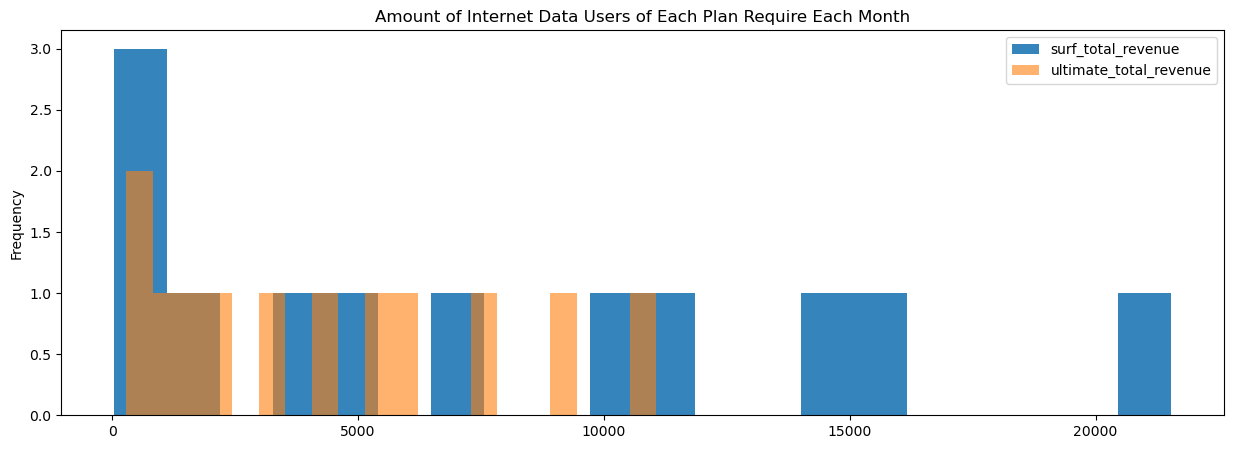

In [52]:
fig, ax = plt.subplots(figsize=[12, 5])
df2[df2['plan']=='surf'].groupby(['month'])[['total_revenue']].sum().plot(kind='hist', bins=20, ax=ax, figsize=[15,5], alpha=0.9)
df2[df2['plan']=='ultimate'].groupby(['month'])[['total_revenue']].sum().plot(kind='hist', bins=20, ax=ax, figsize=[15,5], alpha=0.6)
plt.legend(['surf_total_revenue','ultimate_total_revenue'])
plt.title('Amount of Internet Data Users of Each Plan Require Each Month')
plt.show()

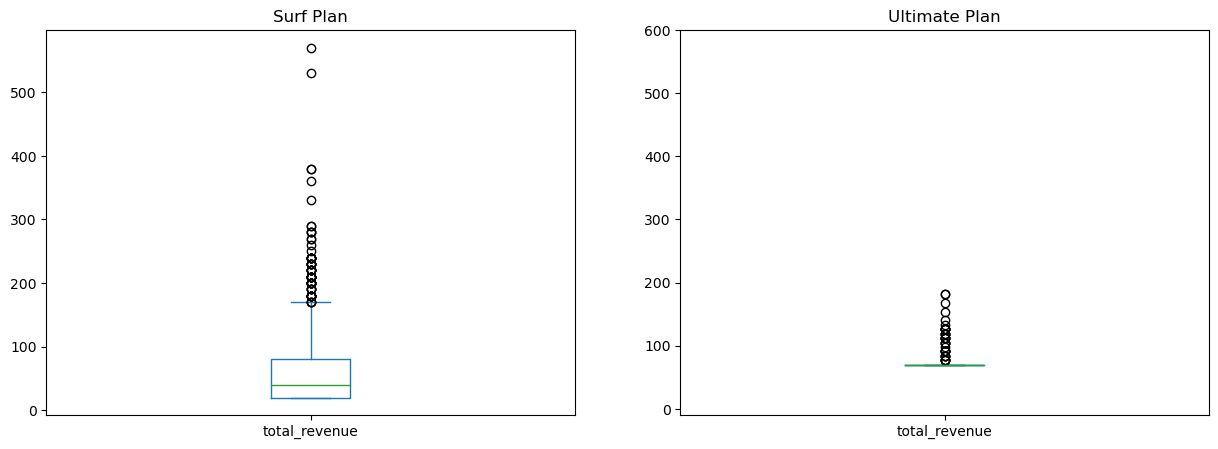

In [53]:
fig, ax = plt.subplots(1, 2, figsize=[15, 5])

df2[df2['plan']=='surf']['total_revenue'].plot(kind='box', ax=ax[0])
df2[df2['plan']=='ultimate']['total_revenue'].plot(kind='box', ax=ax[1])
plt.ylim((-10,600))
ax[0].set_title('Surf Plan')
ax[1].set_title('Ultimate Plan')
plt.show()

In [54]:
display(df2[df2['plan']=='ultimate']['total_revenue'].value_counts())

70.0     683
91.0       6
126.0      6
112.0      5
77.0       5
84.0       4
119.0      4
105.0      4
182.0      2
140.0      1
154.0      1
168.0      1
98.0       1
133.0      1
Name: total_revenue, dtype: int64

In [55]:
display(df2.groupby('plan')['total_revenue'].agg(['min', 'max', 'sum', 'mean', 'median','var', 'std']))

,min,max,sum,mean,median,var,std
plan,,,,,,,
surf,20.0,570.06,92407.18,58.522597,40.0,2960.257789,54.408251
ultimate,70.0,182.00,52346.00,72.301105,70.0,129.159556,11.364839


**Section Observation**
1. surf:  339 users (total 1180 months),  ultimate: 161 users (total 579 months)
2. The total revenue from 'surf' users are higher than 'ultimate' users given the higher user & month counts.
<br> But the average revenue from the 'surf' users are ~20% lower than 'ultimate' users.
3. While the revenue for 'ultimate' plan stays steady, the revenue for 'surf' plan increases steadily throught the year.
<br> This is largely due to the increase in internet usage through out the year, which contributes to internet overcharge revenue.
4. Given the large internet allowance for the 'ultimate' plan, there are barely any overcharge revenue from this plan.
5. Conversely, given the lower internet allowance for the 'surf' plan, there are significant overcharges from its users, sometimes 28x the base plan.
6. Due to these large outliers among the 'surf' plan users, the 'variance' and 'standard deviation' of the 'surf' plan is significantly greater. 

## Test statistical hypotheses

In [56]:
# Test the hypotheses
alpha = 0.05
surf = df2[df2['plan']=='surf']['total_revenue']
ultimate = df2[df2['plan']=='ultimate']['total_revenue']

results = st.ttest_ind(surf, ultimate, equal_var = False)

print('Null Hypothesis: The average revenue from users of the Ultimate and Surf calling plans are the same.\n')
print('p-value:', results.pvalue)

if results.pvalue < 0.05:
    print("We reject the null hypothesis. The average revenue from users of the Ultimate and Surf calling plans differs.")
else:
    print("We can't reject the null hypothesis. The average revenue from users of the Ultimate and Surf calling plans are the same.")

Null Hypothesis: The average revenue from users of the Ultimate and Surf calling plans are the same.

p-value: 2.1397810956359585e-21
We reject the null hypothesis. The average revenue from users of the Ultimate and Surf calling plans differs.


**Comment**
<br>1. I chose an alpha of 0.05, as that's a widely accepted level of significance and I feel comfortable with this level.
<br>2. I chose the two-tailed t-test, as we are checking if the two sample means differ instead of if one is bigger than the other.

In [57]:
display(df2.groupby('state')['total_revenue'].agg(['min', 'max', 'sum', 'mean', 'median','var', 'std']))

,min,max,sum,mean,median,var,std
state,,,,,,,
NYNJ,20.0,280.00,22126.80,58.536508,50.03,1854.597834,43.065042
Other,20.0,570.06,122626.38,63.702016,70.00,2157.637396,46.450376


In [58]:
# Test the hypotheses
alpha = 0.05
nynj = df2[(df2['state']=='NYNJ')]['total_revenue']
other = df2[(df2['state']=='Other')]['total_revenue']

results = st.ttest_ind(nynj, other)

print('Null Hypothesis: The average revenue from users in the NY-NJ area is the same from that of the users from the other regions.\n')
print('p-value:', results.pvalue)

if results.pvalue < 0.05:
    print("We reject the null hypothesis. The average revenue from users in the NY-NJ area is different from that of the users from the other regions.")
else:
    print("We can't reject the null hypothesis. The average revenue from users in the NY-NJ area is the same from that of the users from the other regions.")


Null Hypothesis: The average revenue from users in the NY-NJ area is the same from that of the users from the other regions.

p-value: 0.04563584365143248
We reject the null hypothesis. The average revenue from users in the NY-NJ area is different from that of the users from the other regions.


**Comment**
<br>1. I chose an alpha of 0.05, as that's a widely accepted level of significance and I feel comfortable with this level.
<br>2. I chose the two-tailed t-test, as we are checking if the two sample means differ instead of if one is bigger than the other.

In [59]:
display(plans)
display(df2.groupby('plan')[['usd_monthly_pay', 'call_overcharge','message_overcharge','internet_overcharge','total_overcharge', 'total_revenue']].agg(['mean','sum']))

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


usd_monthly_pay        call_overcharge        message_overcharge  \
                    mean    sum            mean    sum               mean   
plan                                                                        
surf                20.0  31580        0.010754  16.98            0.00646   
ultimate            70.0  50680        0.000000   0.00            0.00000   

               internet_overcharge          total_overcharge            \
           sum                mean      sum             mean       sum   
plan                                                                     
surf      10.2           38.505383  60800.0        38.522597  60827.18   
ultimate   0.0            2.301105   1666.0         2.301105   1666.00   

         total_revenue            
                  mean       sum  
plan                              
surf         58.522597  92407.18  
ultimate     72.301105  52346.00

## General conclusion
1. surf:  339 users (total 1180 months),  ultimate: 161 users (total 579 months)
2. The total revenue from 'surf' users are higher than 'ultimate' users given the higher user & month counts.
<br> But the average revenue from the 'ultimate' users are ~20% higher than 'surf' users.
3. Hence, I recommend allocating more advertising budget to the 'ultimate' plan to increase revenue.
<br> But this will also depend on the advertising ROI or the average aquisition cost for a new 'ultimate' user vs 'surf' user.
4. Given the most revenue for the 'surf' package comes from the internet_overcharges (~2x the package price), increasing the 'usd_per_gb' price could lead to increase in per user total revenue for 'surf' package.
5. In Feb and March, 'ultimate' plan user's average call duration and internet usage are significantly higher than 'surf' plan users. This could be further investigated to see if there are any underlying reasons for this.